![HelioPy](heliopy_logo.png)
    
https://heliopy.org

https://github.com/heliopython/heliopy

- Openly developed python package for in-situ data analysis
- Two main components:
    - Data download/import
    - Spacecraft trajectory analysis


``heliopy.data``
---
- Automatically downloading/importing data
- Currently supports:
    - ACE, ARTEMIS/THEMIS, Cassini, Cluster, DSCOVR, Helios, IMP, MESSENGER, MMS, OMNI, Ulysses, WIND
- Future support for:
    - Parker Solar Probe, Solar Orbiter

``heliopy.data`` example
---

In [1]:
from heliopy.data import helios
from datetime import datetime

starttime = datetime(1976, 4, 7)
endtime = datetime(1976, 4, 20)
probe = '2'

data = helios.corefit(probe, starttime, endtime)

print(data.columns)

Plotting data
---

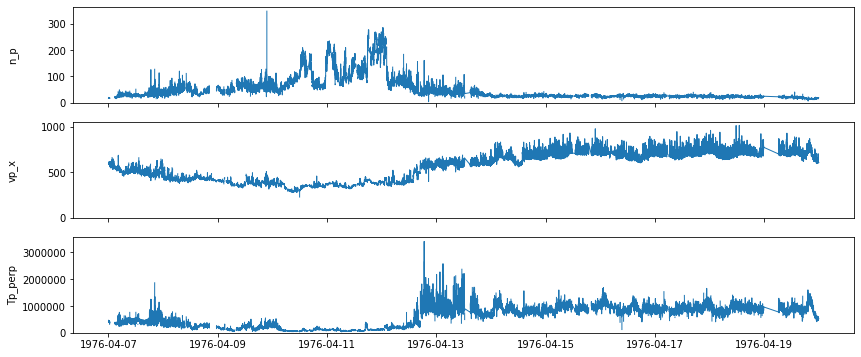

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(14, 6))
for ax, var in zip(axs, ['n_p', 'vp_x', 'Tp_perp']):
    ax.plot(data.index, data.quantity(var), lw=1)
    ax.set_ylabel(var)
    ax.set_ylim(bottom=0)
fig.align_ylabels()

``heliopy.spice``
---
- Working with SPICE kernels
- Built-in support for:
    - Helios, Juno, **PSP**, **Solar Orbiter**, STEREO, Ulysses
- Can work with custom SPICE kernels

``heliopy.spice`` example
---

In [5]:
from heliopy import spice
import heliopy.data.spice as spicedata

# Download and load Solar Orbiter predicted SPICE kernel
spice.furnish(spicedata.get_kernel('solo_2020'))
solo = spice.Trajectory('Solar Orbiter')

# Specify times at which to sample the trajectory
from datetime import datetime, timedelta
starttime = datetime(2020, 2, 20)
times = [starttime + timedelta(days=i) for i in range(365)]

# Generate the trajectory
solo.generate_positions(times, 'Sun', 'ECLIPJ2000')

# Print first 3 positions
print('Positions:', solo.x[:3], solo.y[:3], solo.z[:3], sep='\n')

Positions:
[-1.25784441e+08 -1.26850957e+08 -1.27878734e+08] km
[78155963.85469837 76303653.90518707 74428042.1756    ] km
[ 895595.67536024  963495.00362951 1031100.09167531] km


In [6]:
import matplotlib.pyplot as plt
import astropy.units as u

def plot_orbit(traj):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(traj.x.to(u.au), traj.y.to(u.au), lw=1)
    ax.scatter(0, 0, color='C1')
    ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1);
    return fig, ax

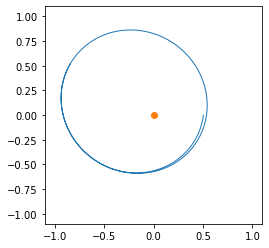

In [7]:
solo.generate_positions(times, 'Sun', 'ECLIPJ2000')
fig, ax = plot_orbit(solo)

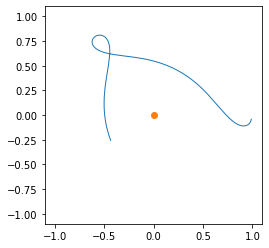

In [8]:
solo.generate_positions(times, 'Sun', 'HEE')
fig, ax = plot_orbit(solo)

![HelioPy](heliopy_logo.png)
    
https://heliopy.org

- Help needed for:
    - Coordinate system transforms
    - More data import functions
- Please put requests at **https://github.com/heliopython/heliopy/issues**